In [58]:
# Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings    # importing python warning module
sns.set_theme()            #setting seaborn as default style for plots when using matplotlib

# Assignment 5 
## Risk

Write a program (or notebook) called assignment_5_risk (.py or .ipynb)

The program should simulates 1000 individual battle rounds in Risk (3 attacker vs 2 defender) and plots the result.

One battle round is one shake of the attacker and defender dice.

I am being vague about what it plot, I will leave that to you.

For the last few marks.

A more complicated version simulates a full series of rounds for armies of arbitrary sizes, until one side is wiped out,

and plots the results.

(This is open ended, so it is only for the last few marks)

## Risk Strategy notes
- Mission: To conquer all the territories
- Players: Army A (Attacker) vs Army B
- Dice: 6 sided dice
- One round: Attacker round the dice 3 times and the defender round the dice 2 times.
- Dice compared per round: 
  - Total dice rolled (5): Sum of attacker (3) vs defenders (2) dice rolled
   - Sort all 5 dice rolled from highest to lowest (descending order)
   - Compare attackers highest 2 dice round vs defenders 2 dice round
- Winning Rules:
 1. Compare the highest dice first and determine winner for the first dice;
   - Attacker loses one troop when each dice roll is ≤ defenders dice roll. 
   - Defender loses one troop when attackers dice roll is > defenders
 2. Compare the second highest dice next and determine winner for the second dice: 
  - Attacker loses one troop when each dice roll is ≤ defenders dice roll. 
  - Defender loses one troop when attackers dice roll is > defenders
= Task: Simulate 1000 individual battle rounds in Risk (3 attacker vs 2 defender) and plot the result.

         



## Simulating the risk game battle approach
A combination of codes and functions were utilized to handle this task and the steps involved in building up this function are in the cells below. This approach was used to offer simplicity and easy debugging of the codes when run in simpler blocks before integrating all into a function. The aricle by Stephen Gruppetta on using Python’s NumPy To Improve Your Board Game Strategy: Your Odds When Attacking in ‘Risk’ was very helpful in tackling this assignment and it can be found [here](https://thepythoncodingbook.com/2022/12/30/using-python-numpy-to-improve-board-game-strategy-risk/)

In [59]:
# Define the number of battle rounds
n_round = 1000 # 1000 battle rounds

In [60]:
#  Define the number of battle rounds
n_round = 1000 # 1000 battle rounds

In [61]:
# simulating risk game play using numpy random numbers generator with  a 6-sided dice round per attack 

attacker = np.random.randint(1, 7, (n_round, 3))  # number of battle rounds, attacker round 3 dice per attack
defender = np.random.randint(1, 7, (n_round, 2))  # number of battle rounds, defender round 2 dice dice per attack
print (attacker)

[[4 5 6]
 [5 5 5]
 [2 6 1]
 ...
 [2 2 1]
 [2 3 3]
 [2 3 5]]


In [62]:
print (defender)

[[2 3]
 [6 6]
 [6 1]
 ...
 [4 4]
 [3 6]
 [5 1]]


In [63]:
 #Sort the round in descending order
attacker_sorted = np.sort(attacker, axis=1)[:, ::-1]
defender_sorted = np.sort(defender, axis=1)[:, ::-1]
print (attacker_sorted)

[[6 5 4]
 [5 5 5]
 [6 2 1]
 ...
 [2 2 1]
 [3 3 2]
 [5 3 2]]


In [64]:
print (defender_sorted)

[[3 2]
 [6 6]
 [6 1]
 ...
 [4 4]
 [6 3]
 [5 1]]


In [65]:
# Determine loss per round for attacker and defender
attacker_losses = 0
defender_losses = 0

In [66]:
# Loop through each round
for i in range(n_round):
    # Compare the highest dice roll
    if attacker_sorted[i, 0] <= defender_sorted[i, 0]:
        attacker_losses += 1
    else:
        defender_losses += 1
        # Compare the second-highest dice roll
     
    if attacker_sorted[i, 1] <= defender_sorted[i, 1]:
           attacker_losses += 1
    else:
        defender_losses += 1


## Dice Roll function: The above codes were merged to describe a reusablefunction.

In [67]:
# Defining a function for 6-sided dice round Risk Game
def dice_round(n_round):
    # Simulating risk game play using numpy random numbers generator for a 6-sided dice roll per attack 
    attacker = np.random.randint(1, 7, (n_round, 3))  # attacker rolls 3 dice per round
    defender = np.random.randint(1, 7, (n_round, 2))  # defender rolls 2 dice per round
    
    # Sort the rolls in descending order
    attacker_sorted = np.sort(attacker, axis=1)[:, ::-1]
    defender_sorted = np.sort(defender, axis=1)[:, ::-1]
    
    # Initialize total losses for attacker and defender
    attacker_losses = 0
    defender_losses = 0

    # Lists to track cumulative losses per round
    attacker_losses_cumulative = []
    defender_losses_cumulative = []

    # Loop through each round to determine losses
    for i in range(n_round):
        # Compare the highest dice roll
        if attacker_sorted[i, 0] <= defender_sorted[i, 0]:
            attacker_losses += 1
        else:
            defender_losses += 1

        # Compare the second-highest dice roll
        if attacker_sorted[i, 1] <= defender_sorted[i, 1]:
            attacker_losses += 1
        else:
            defender_losses += 1

        # Record the cumulative losses after each round
        attacker_losses_cumulative.append(attacker_losses)
        defender_losses_cumulative.append(defender_losses)

    # Return the lists of cumulative losses
    return attacker_losses_cumulative, defender_losses_cumulative


# Call the dice_round function
attacker_losses_cumulative, defender_losses_cumulative = dice_round(n_round)

# Print total losses after all rounds
print(f"The total number of attacker losses for {n_round} rounds is: {attacker_losses_cumulative[-1]}")
print(f"The total number of defender losses for {n_round} rounds is: {defender_losses_cumulative[-1]}")
plt.show()


The total number of attacker losses for 1000 rounds is: 929
The total number of defender losses for 1000 rounds is: 1071


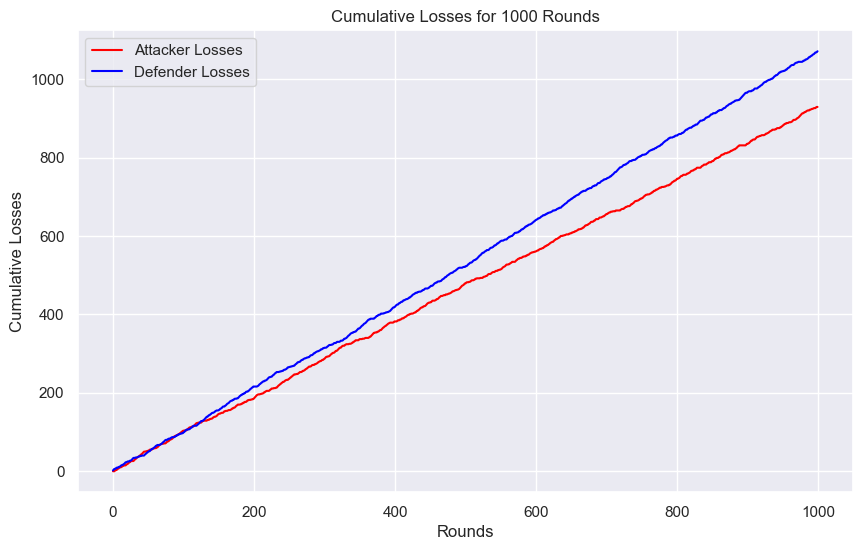

In [68]:
# Plotting the attacker losses vs defender losses through the rounds

plt.figure(figsize=(10, 6))
plt.plot(attacker_losses_cumulative, label="Attacker Losses", color='red')
plt.plot(defender_losses_cumulative, label="Defender Losses", color='blue')
plt.xlabel("Rounds")
plt.ylabel("Cumulative Losses")
plt.title(f"Cumulative Losses for {n_round} Rounds")
plt.legend()
plt.grid(True)

## ? Add pie chart and percentage losses

## modify code to reflect
A more complicated version simulates a full series of rounds for armies of arbitrary sizes, until one side is wiped out,

and plots the results.

## References
- https://numpy.org/doc/stable/user/absolute_beginners.html
- https://www.w3schools.com/python/numpy/numpy_random.asp
- https://prepfortech.io/leetcode-solutions/dice-roll-simulation
- https://thepythoncodingbook.com/2022/12/30/using-python-numpy-to-improve-board-game-strategy-risk/
- https://datascienceparichay.com/article/sort-numpy-array-in-descending-order/
- https://sqlpey.com/python/numpy-array-sorting/
- https://numpy.org/doc/stable/reference/generated/numpy.ndarray.sort.html